In [9]:
import os
import sys
cur_dir = os.path.abspath(".")
sys.path.append(cur_dir + "/../paddlespatial/tools/genregion/src/")
print(sys.path)

['/home/users/liyanyanliyanyan/baidu/bil-plat/PaddleSpatial/tutorials', '/home/work/anaconda3/lib/python38.zip', '/home/work/anaconda3/lib/python3.8', '/home/work/anaconda3/lib/python3.8/lib-dynload', '', '/home/work/anaconda3/lib/python3.8/site-packages', '/home/work/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg', '/home/work/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/work/.ipython', '/home/users/liyanyanliyanyan/baidu/bil-plat/PaddleSpatial/tutorials../paddlespatial/tools/genregion/src/', '/home/users/liyanyanliyanyan/baidu/bil-plat/PaddleSpatial/tutorials../paddlespatial/tools/genregion/src/', '/home/users/liyanyanliyanyan/baidu/bil-plat/PaddleSpatial/tutorials../paddlespatial/tools/genregion/src/', '/home/users/liyanyanliyanyan/baidu/bil-plat/PaddleSpatial/tutorials/../paddlespatial/tools/genregion/src/']


In [12]:
from generate import etl
from generate import block
city_name = "wuhan"
in_file = "../paddlespatial/tools/genregion/data/Wuhan_Edgelist.csv"
out_file = "../paddlespatial/tools/genregion/result/block_wuhan"
block.run(city_name, in_file, out_file)

2021-12-02 17:48:03 wuhan
2021-12-02 17:48:07 roadnet seg count: 30145
2021-12-02 17:48:07 block gen
2021-12-02 17:48:07 seg file: wuhan_segs.txt
2021-12-02 17:48:08 seg points count: 21560
2021-12-02 17:48:08 cluster count: 21524
2021-12-02 17:48:08 pointmap finished
2021-12-02 17:48:09 simply seg count: 29778
2021-12-02 17:48:19 split seg count: 29798
2021-12-02 17:48:22 origin region count: 0
2021-12-02 17:48:22 merge region count: 0
2021-12-02 17:48:22 filter region count: 0
2021-12-02 17:48:22 block info
2021-12-02 17:48:22 finished


/home/work/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:370: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


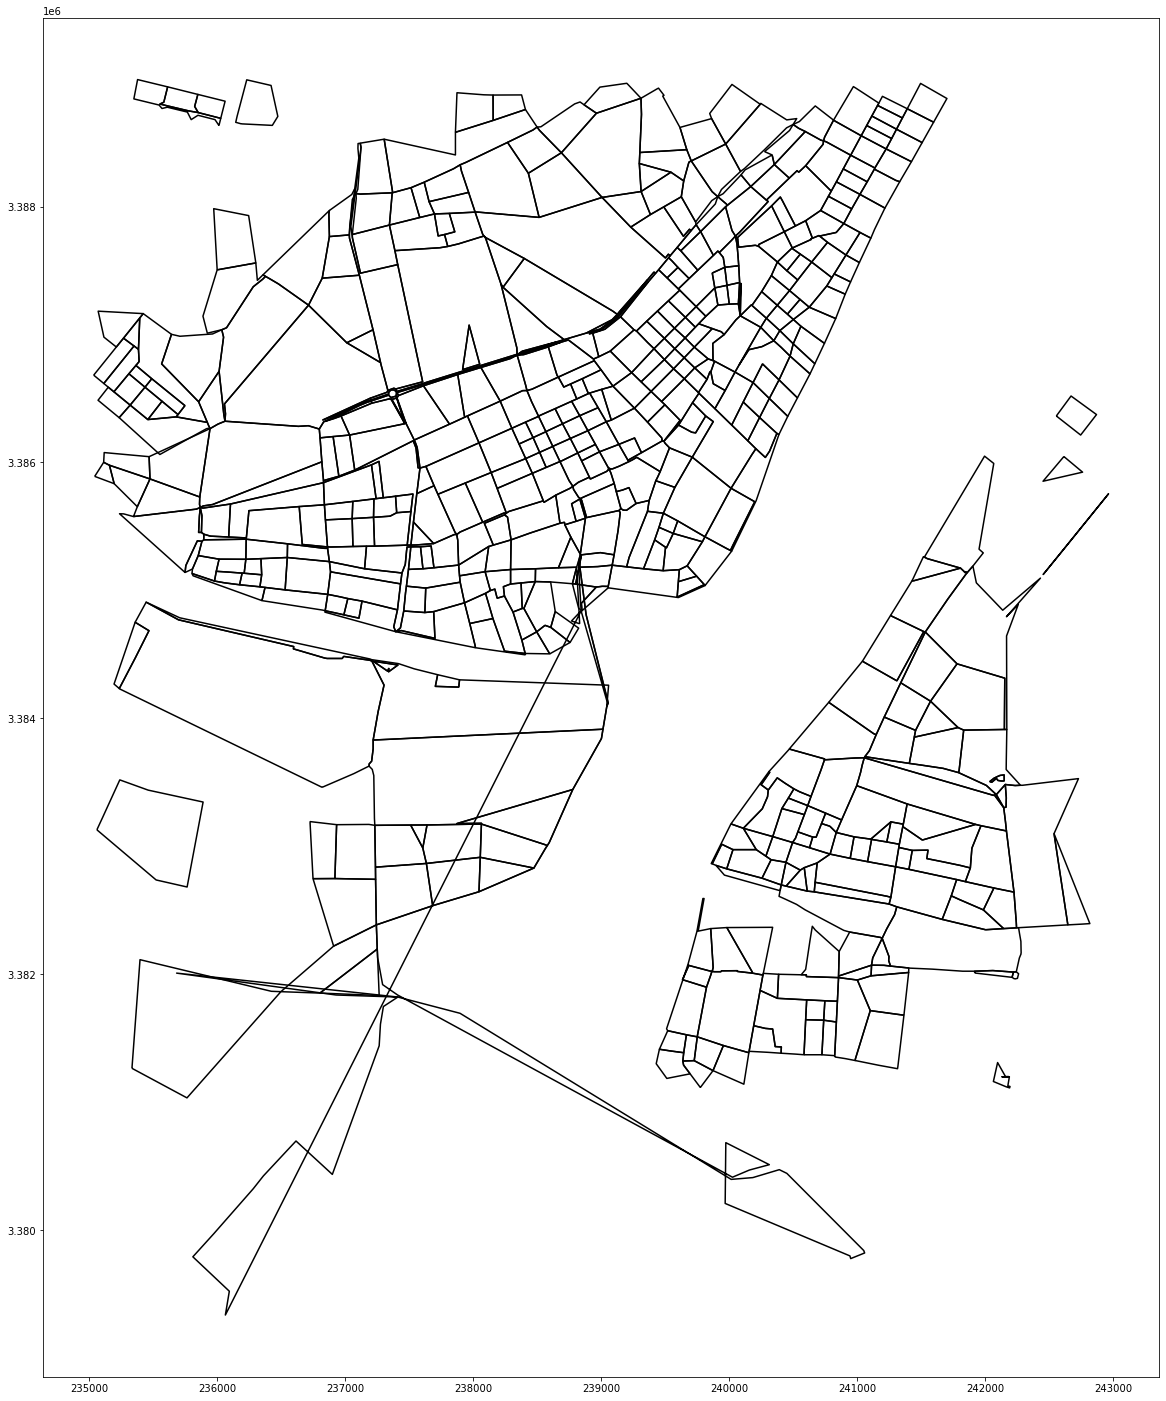

In [2]:
#coding=utf-8
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shapely
import geopandas as gp
# 235000, 243000, 3381000, 3389000
wuhan_polygon_list = []
with open('block_wuhan', 'r') as fi:
    line = fi.readline()
    count = 0
    while line!='':
        count+=1
        col = line.strip().split('\t')
        p = shapely.wkt.loads(col[3])
        wuhan_polygon_list.append(p)
        line = fi.readline()
gps_wuhan = gp.GeoSeries(wuhan_polygon_list)
df_wh = gps_wuhan.to_frame(name="geometry")
block_selection = shapely.geometry.Polygon([[235000, 3381000],[243000,3381000],[243000,3389000],[235000,3389000]])
select_block = df_wh[(df_wh.geometry.within(block_selection))] #& (df_bj.intersection(block_selection)!=shapely.geometry.Polygon())
select_block = select_block.reset_index(drop=True)
f, ax = plt.subplots(1, figsize=(25, 25))
ax =select_block.boundary.plot(axes=ax, color = 'black')
#plt.savefig('block_selection.png')
plt.show()